In [11]:
! pip install tabulate

You should consider upgrading via the 'c:\users\liged\chatgptpoc\env\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from langchain.llms import OpenAI
import os

my_api_key = os.getenv("OPENAI_API_KEY")


In [160]:
from langchain.agents import create_pandas_dataframe_agent
import pandas as pd
import json
import matplotlib.pyplot as plt

class GraphAgent:

    def __init__(self, llm_api_key: str):
        self.llm_api_key = llm_api_key
        
    def create_agent(self, filename: str):
        """
        Create an agent that can access and use a large language model (LLM).

        Args:
            filename: The path to the CSV file that contains the data.

        Returns:
            An agent that can access and use the LLM.
        """

        self.llm = OpenAI(openai_api_key=self.llm_api_key)
        df = pd.read_csv(filename)
        self.agent = create_pandas_dataframe_agent(self.llm, df, verbose=False)
        return self

    def query_agent(self, query):
        """
        Query an agent and return the response as a string.

        Args:
            agent: The agent to query.
            query: The query to ask the agent.

        Returns:
            The response from the agent as a string.
        """

        prompt = (
            """
                For the query, if it requires drawing a table, reply as follows:
                {"table": {"columns": ["column1", "column2", ...], "data": [[value1, value2, ...], [value1, value2, ...], ...]}}

                If the query requires creating a bar chart, reply as follows:
                {"bar": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}
                If the data is nested: 
                "data": [[n1, 25], [n2, 24], [n3, 10], ...]

                If the query requires creating a line chart, reply as follows:
                {"line": {"columns": ["A", "B", "C", ...], "data": [25, 24, 10, ...]}}
                If the data is nested: 
                "data": [[n1, 25], [n2, 24], [n3, 10], ...]    
                        
                There can only be two types of chart, "bar" and "line".

                If it is just asking a question that requires neither, reply as follows:
                {"answer": "answer"}

                Example:
                {"answer": "The title with the highest rating is 'Gilead'"}

                If you do not know the answer, reply as follows:
                {"answer": "I do not know."}

                Return all output as a string.

                All strings in "columns" list and data list, should be in double quotes,

                For example: {"columns": ["title", "ratings_count"], "data": [["Gilead", 361], ["Spider's Web", 5164]]}

                Lets think step by step.

                Below is the query.
                Query: 
                """
            + query
        )

        response = self.agent.run(prompt)
        self.response = response.__str__()

    def graph(self):
        response = json.loads(self.response)

        # Check if the response is an answer.
        if "answer" in response:
            print(response["answer"])

        # Check if the response is a bar chart.
        if "bar" in response:
            data = response["bar"]
            df = pd.DataFrame.from_records(**data)
            df.index = df[data["columns"][0]]
            df.plot(kind="bar")

        # Check if the response is a line chart.
        if "line" in response:
            data = response["line"]
            df = pd.DataFrame.from_records(**data)
            df.index = df[data["columns"][0]]
            df.plot()
            
        # Check if the response is a table.
        if "table" in response:
            data = response["table"]
            df = pd.DataFrame(data["data"], columns=data["columns"])
            display(df)


In [171]:
graph_prompt = """Plot a histogram or barchart of total ages of all NBA players use 14 buckets, plot from youngest to oldest"""

In [172]:
from pathlib import Path as P
csvpath = P.cwd() / "sample_data" / "all_seasons.csv"
agent = GraphAgent(my_api_key).create_agent(csvpath)
agent.query_agent(graph_prompt)

In [173]:
agent.response

'{"bar": {"columns": ["age", "count"], "data": [[18, 3], [19, 73], [20, 286], [21, 500], [22, 771], [23, 1164], [24, 1277], [25, 1141], [26, 1015], [27, 972], [28, 868], [29, 785], [30, 711], [31, 620], [32, 549], [33, 450], [34, 353], [35, 250], [36, 200], [37, 135], [38, 85], [39, 51], [40, 29], [41, 9], [42, 4], [43, 3], [44, 1]]}}'

In [174]:
with open("results.txt", "a+") as f:
    f.write("PROMPT:" + graph_prompt + "\n")
    f.write("RESPONSE:" + agent.response + "\n")

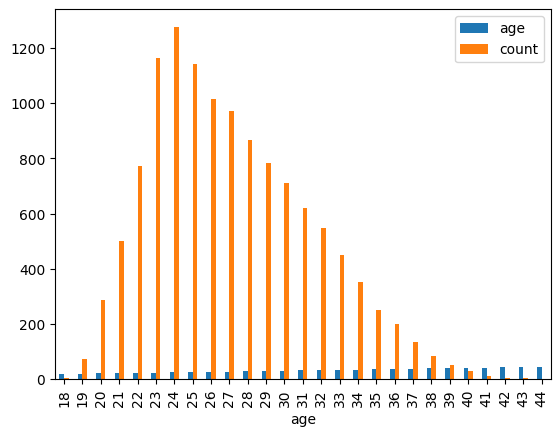

In [175]:
agent.graph()

In [201]:
import openai

response = openai.Image.create(
  prompt="biryani",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-S7EMI5sGwNHzs3coJHLnmomA/user-iaRe1zFJZBVHuDTGQ8FmtFc9/img-1xpArV4yZXkx9WR4WDTnifxj.png?st=2023-05-26T16%3A44%3A20Z&se=2023-05-26T18%3A44%3A20Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-26T14%3A46%3A30Z&ske=2023-05-27T14%3A46%3A30Z&sks=b&skv=2021-08-06&sig=%2BLOTwCqEuCelMQxV/nH%2B5egIIe87dp2XtuewNPraGOA%3D'